<a href="https://colab.research.google.com/github/plaban1981/open_cv_projects/blob/main/Semantic_Segmentation_using_Enet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic segmentation with OpenCV and deep learning using enet architecture

#### import required libraries

In [1]:
import numpy as np
import argparse
import imutils
import time
import cv2

#### load the class label names

In [2]:
CLASSES = open("/content/enet-classes.txt").read().strip().split("\n")

In [3]:
CLASSES

['Unlabeled',
 'Road',
 'Sidewalk',
 'Building',
 'Wall',
 'Fence',
 'Pole',
 'TrafficLight',
 'TrafficSign',
 'Vegetation',
 'Terrain',
 'Sky',
 'Person',
 'Rider',
 'Car',
 'Truck',
 'Bus',
 'Train',
 'Motorcycle',
 'Bicycle']

In [4]:
len(CLASSES)

20

## Randomly genereate colors for each label

In [5]:
# initialize a list of colors to represent each class label in
# the mask (starting with 'black' for the background/unlabeled
# regions)
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(CLASSES) - 1, 3),dtype="uint8")
print(COLORS.shape)
print(COLORS)
# add black color for unlabeled or background at the top
COLORS = np.vstack([[0, 0, 0], COLORS]).astype("uint8")

(19, 3)
[[102 220 225]
 [ 95 179  61]
 [234 203  92]
 [  3  98 243]
 [ 14 149 245]
 [ 46 106 244]
 [ 99 187  71]
 [212 153 199]
 [188 174  65]
 [153  20  44]
 [203 152 102]
 [214 240  39]
 [121  24  34]
 [114 210  65]
 [239  39 214]
 [244 151  25]
 [ 74 145 222]
 [ 14 202  85]
 [145 117  87]]


In [6]:
COLORS

array([[  0,   0,   0],
       [102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245],
       [ 46, 106, 244],
       [ 99, 187,  71],
       [212, 153, 199],
       [188, 174,  65],
       [153,  20,  44],
       [203, 152, 102],
       [214, 240,  39],
       [121,  24,  34],
       [114, 210,  65],
       [239,  39, 214],
       [244, 151,  25],
       [ 74, 145, 222],
       [ 14, 202,  85],
       [145, 117,  87]], dtype=uint8)

## Generate Legend Visualization

In [7]:
# initialize the legend visualization
legend = np.zeros(((len(CLASSES) * 25) + 25, 300, 3), dtype="uint8")
legend.shape

(525, 300, 3)

## Loop through the class name and colors and add text (class name + color) as legend on the text

In [8]:
for (i, (className, color)) in enumerate(zip(CLASSES, COLORS)):
	# draw the class name + color on the legend
	color = [int(c) for c in color]
	cv2.putText(legend, className, (5, (i * 25) + 17),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
	cv2.rectangle(legend, (100, (i * 25)), (300, (i * 25) + 25),tuple(color), -1)

## load our serialized model from disk- ENET architecture

In [9]:
net = cv2.dnn.readNet("/content/enet-model.net")

In [88]:
net.getParam('l2_Convolution')

array([[[[-0.14965409, -0.08004642, -0.02564991],
         [-0.01359834, -0.1974887 , -0.29879805],
         [-0.10484306, -0.02058646, -0.29087615]],

        [[ 0.01483973,  0.17415817, -0.14739668],
         [ 0.16511074, -0.00999041, -0.16546105],
         [-0.06391309,  0.25257266,  0.08940168]],

        [[ 0.01500956,  0.11474492,  0.01330876],
         [ 0.15477975,  0.169512  ,  0.17421302],
         [ 0.17712137,  0.13000447,  0.11624824]]],


       [[[ 0.29650795, -0.17667277, -0.24238938],
         [ 0.03316497, -0.13278846,  0.03043325],
         [ 0.04080407, -0.01130358,  0.15463455]],

        [[ 0.26261348,  0.15401109, -0.22877295],
         [ 0.04404733,  0.06149514, -0.00602282],
         [-0.20671816,  0.09282207, -0.04410573]],

        [[ 0.31477815, -0.14787862, -0.23942843],
         [-0.04584157,  0.01764722,  0.00623237],
         [-0.01804464,  0.0141008 ,  0.00468246]]],


       [[[ 0.16368195,  0.07634762, -0.14341825],
         [ 0.06935634,  0.13642313

In [10]:
net.getLayerNames()

['l2_Convolution',
 'l3_Pooling',
 'l4_torchMerge',
 'l5_BatchNorm',
 'l6_ChannelsPReLU',
 'l8_Convolution',
 'l9_BatchNorm',
 'l10_ChannelsPReLU',
 'l11_Convolution',
 'l12_BatchNorm',
 'l13_ChannelsPReLU',
 'l14_Convolution',
 'l15_BatchNorm',
 'l16_Power',
 'l17_Identity',
 'l18_Pooling',
 'l19_Padding',
 'l20_torchCAddTable',
 'l21_ChannelsPReLU',
 'l23_Convolution',
 'l24_BatchNorm',
 'l25_ChannelsPReLU',
 'l26_Convolution',
 'l27_BatchNorm',
 'l28_ChannelsPReLU',
 'l29_Convolution',
 'l30_BatchNorm',
 'l31_Power',
 'l32_Identity',
 'l33_torchCAddTable',
 'l34_ChannelsPReLU',
 'l36_Convolution',
 'l37_BatchNorm',
 'l38_ChannelsPReLU',
 'l39_Convolution',
 'l40_BatchNorm',
 'l41_ChannelsPReLU',
 'l42_Convolution',
 'l43_BatchNorm',
 'l44_Power',
 'l45_Identity',
 'l46_torchCAddTable',
 'l47_ChannelsPReLU',
 'l49_Convolution',
 'l50_BatchNorm',
 'l51_ChannelsPReLU',
 'l52_Convolution',
 'l53_BatchNorm',
 'l54_ChannelsPReLU',
 'l55_Convolution',
 'l56_BatchNorm',
 'l57_Power',
 'l58_

## Load the input image, resize it, and construct a blob from it

In [13]:
!wget https://5.imimg.com/data5/AN/JE/XM/SELLER-920798/traffic-signal-system-500x500.jpg

--2020-11-18 12:56:00--  https://5.imimg.com/data5/AN/JE/XM/SELLER-920798/traffic-signal-system-500x500.jpg
Resolving 5.imimg.com (5.imimg.com)... 13.224.10.48, 13.224.10.124, 13.224.10.126, ...
Connecting to 5.imimg.com (5.imimg.com)|13.224.10.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31651 (31K) [image/jpeg]
Saving to: ‘traffic-signal-system-500x500.jpg’

traffic-signal-syst 100%[===================>]  30.91K   134KB/s    in 0.2s    

2020-11-18 12:56:01 (134 KB/s) - ‘traffic-signal-system-500x500.jpg’ saved [31651/31651]



In [11]:
from google.colab.patches import cv2_imshow

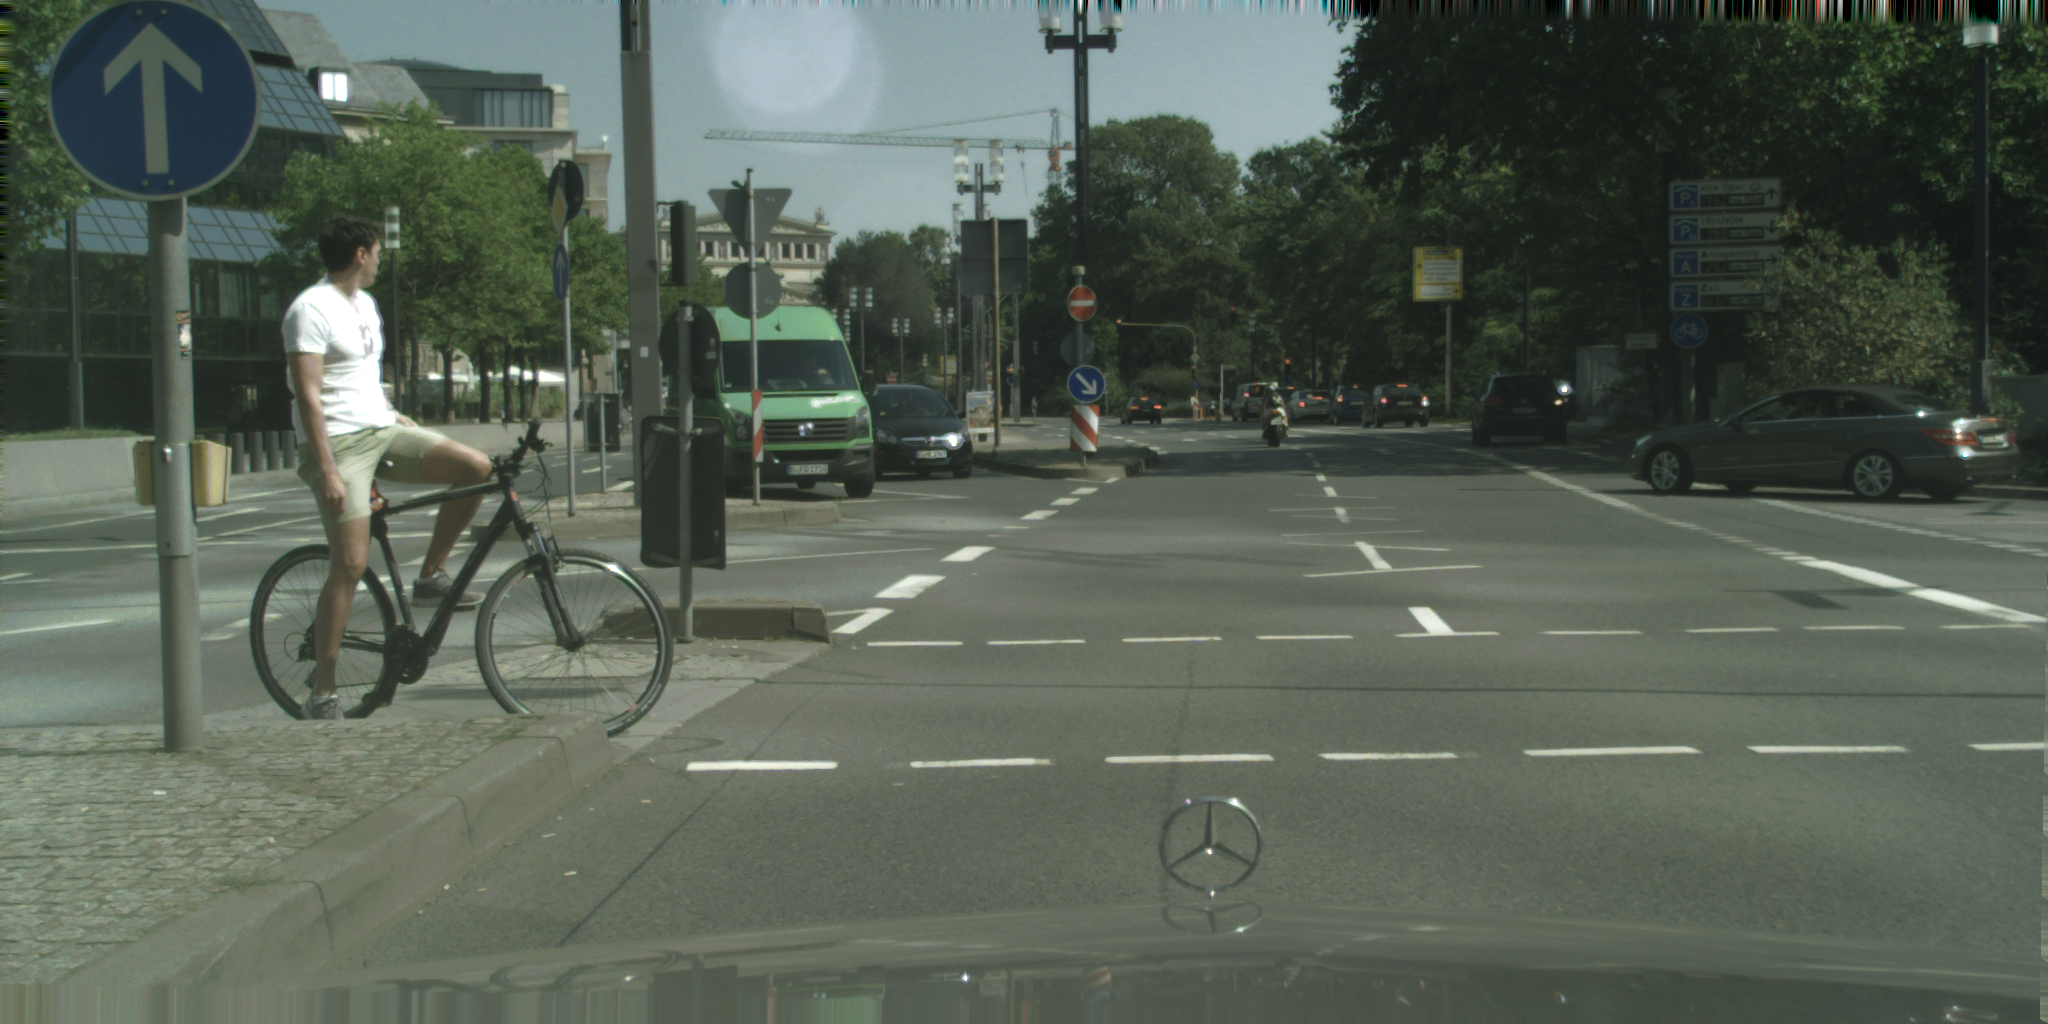

(1024, 2048, 3)


In [58]:
image = cv2.imread("/content/example_01.png")
cv2_imshow(image)
print(image.shape)
image = imutils.resize(image, width=image.shape[1])

In [59]:
image.shape

(1024, 2048, 3)

## Construct a blob from resized image

* image - the image to be processed
* scale factor - 1/255.0
* size - spatial size of the image (1024 ,512)
* mean - subtraction of mean values
* swapRB - OpenCV images are in BGR channel order however mean values assume that we are using RGB order.so True indicates we are swapping Blue and RED channels
* crop = whether to crop images

In [60]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0,swapRB=True, crop=False)

In [61]:
blob

array([[[[0.33333334, 0.3137255 , 0.29411766, ..., 0.14509805,
          0.20000002, 0.03921569],
         [0.3529412 , 0.3372549 , 0.32156864, ..., 0.15294118,
          0.18823531, 0.04313726],
         [0.03921569, 0.07058824, 0.10196079, ..., 0.16078432,
          0.18039216, 0.04313726],
         ...,
         [0.44705886, 0.43137258, 0.43529415, ..., 0.47450984,
          0.4666667 , 0.4666667 ],
         [0.44705886, 0.43529415, 0.43529415, ..., 0.34901962,
          0.43529415, 0.43529415],
         [0.44705886, 0.43529415, 0.43921572, ..., 0.25882354,
          0.25490198, 0.34509805]],

        [[0.37254903, 0.35686275, 0.34117648, ..., 0.08627451,
          0.09411766, 0.        ],
         [0.40000004, 0.38823533, 0.37254903, ..., 0.09411766,
          0.09019608, 0.        ],
         [0.13333334, 0.16470589, 0.19215688, ..., 0.10588236,
          0.09019608, 0.        ],
         ...,
         [0.48235297, 0.46274513, 0.46274513, ..., 0.5254902 ,
          0.52156866, 0.5

# perform a forward pass using the segmentation model

In [62]:
net.setInput(blob)

In [63]:
start = time.time()
output = net.forward()
end = time.time()

In [64]:
# show the amount of time inference took
print("The inference took {:.4f} seconds".format(end - start))

The inference took 0.5158 seconds


## The output class ID map will be num_classes x height x width in size

In [65]:
output.shape

(1, 20, 512, 1024)

## Infer the total number of classes along with the spatial dimensions(height and width) of the mask image via the shape of the output array

In [66]:
(numClasses, height, width) = output.shape[1:4]

## Find the class label with the largest probability for each and every (x, y)-coordinate in the image

In [67]:
classMap = np.argmax(output[0], axis=0)
np.unique(classMap[0])

array([0])

## Map each of the class IDs to its corresponding color


In [68]:
mask = COLORS[classMap]
mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## resize the mask and class map such that its dimensions match the original size of the input image (we're not using the class map here for anything else but this is how you would resize it just in case you wanted to extract specific pixels/classes)

In [69]:
mask = cv2.resize(mask, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)
classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)

## perform a weighted combination of the input image with the mask to form an output visualization

In [70]:
legend.shape,image.shape,output.shape

((525, 300, 3), (1024, 2048, 3), (1, 20, 512, 1024))

In [72]:
output = ((0.4 * image) + (0.6 * mask)).astype("uint8")

In [73]:
image1 = cv2.resize(image,(legend.shape[1],legend.shape[0]))
output1 = cv2.resize(output,(legend.shape[1],legend.shape[0]))
image1.shape,output1.shape,legend.shape

((525, 300, 3), (525, 300, 3), (525, 300, 3))

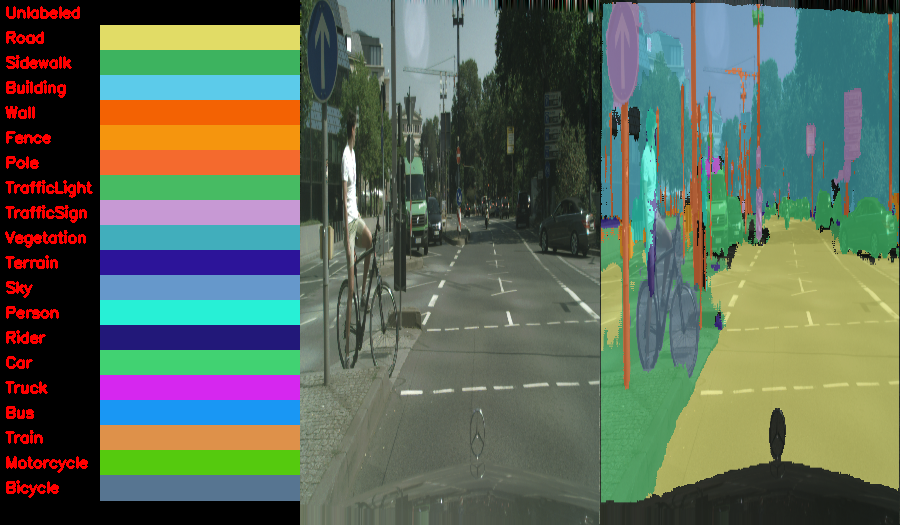

In [74]:

# show the input and output images
hor =np.hstack((legend,image1,output1))

#cv2_imshow(legend)
cv2_imshow(hor)
#cv2_imshow(image)
#cv2_imshow(output)


# Image 2 

In [76]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w&usqp=CAU

--2020-11-18 13:42:43--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.195.102, 74.125.195.100, 74.125.195.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8520 (8.3K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w’

images?q=tbn:ANd9Gc 100%[===================>]   8.32K  --.-KB/s    in 0s      

2020-11-18 13:42:43 (83.4 MB/s) - ‘images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w’ saved [8520/8520]



In [77]:
image2 = cv2.imread("/content/images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w")

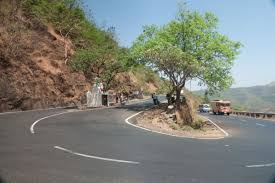

In [79]:
cv2_imshow(image2)

## Define a function to use ENET Model to perform image segmentation

In [81]:
def segment_image(image):
  #construct blob from image
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0,swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  #forward pass the image through the enet model
  output = net.forward()
  end = time.time()
  # show the amount of time inference took
  print("The inference took {:.4f} seconds".format(end - start))
  #infer total number of classes
  (numClasses, height, width) = output.shape[1:4]
  #Find the class label with highest probability
  classMap = np.argmax(output[0], axis=0)
  #map each of the class id to its respective color
  mask = COLORS[classMap]
  #resize mask and clas map to match dimensions of original image
  mask = cv2.resize(mask, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)
  classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)
  # perform a weighted combination of the input image with the mask to
  # form an output visualization
  output = ((0.4 * image) + (0.6 * mask)).astype("uint8")
  # resize the mask and output image such that we can have all the images
  # displayed in the same axis
  image1 = cv2.resize(image,(legend.shape[1],legend.shape[0]))
  output1 = cv2.resize(output,(legend.shape[1],legend.shape[0])) 
  # show the input and output images
  hor =np.hstack((legend,image1,output1))
  cv2_imshow(hor)

The inference took 0.5200 seconds


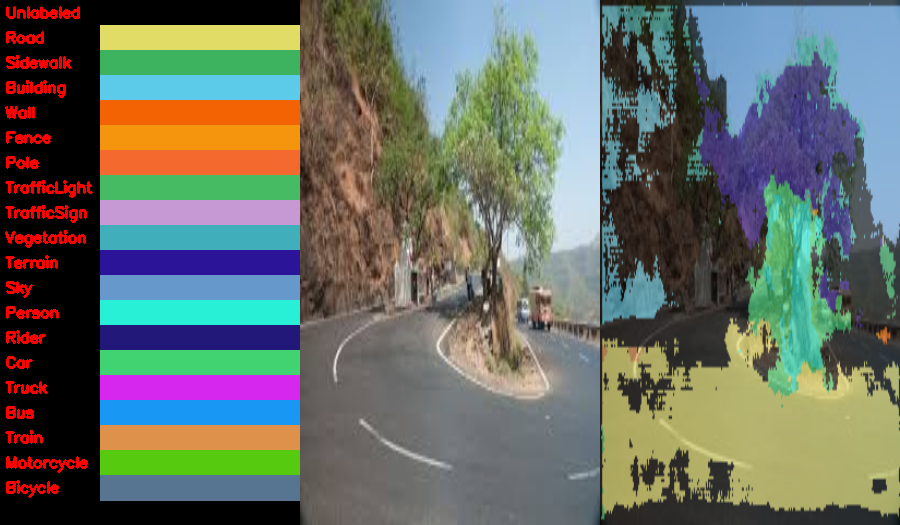

In [82]:
segment_image(image2)

## Perform segmentation on list of images

In [83]:
image_list = ['/content/example_01.png','/content/example_03.jpg','/content/images?q=tbn:ANd9GcTvoSvc50xeOXMouU6Xxppst2jsezMkJwqL3w','/content/traffic-signal-system-500x500.jpg']

The inference took 0.5266 seconds


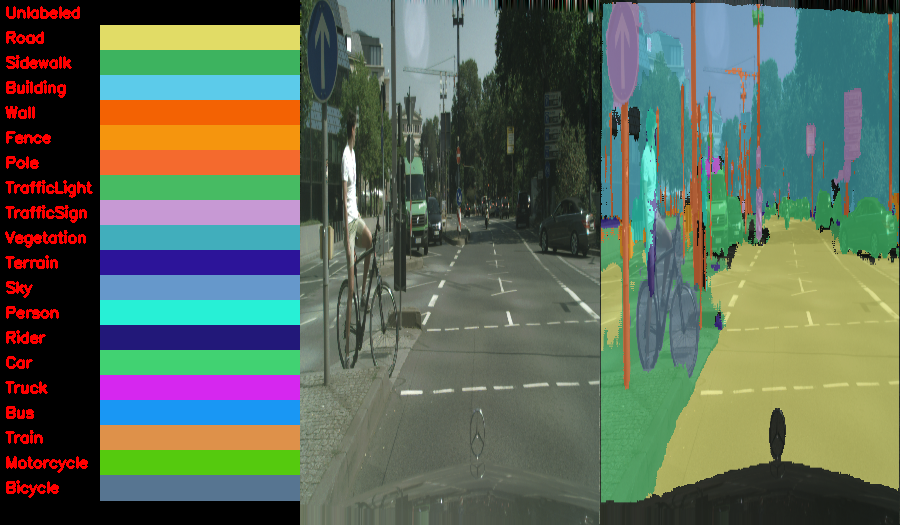

The inference took 0.6338 seconds


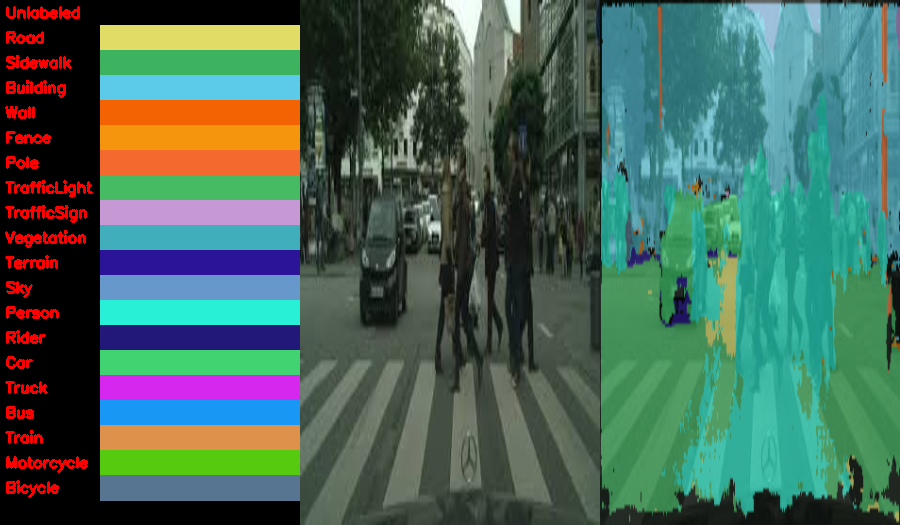

The inference took 0.5884 seconds


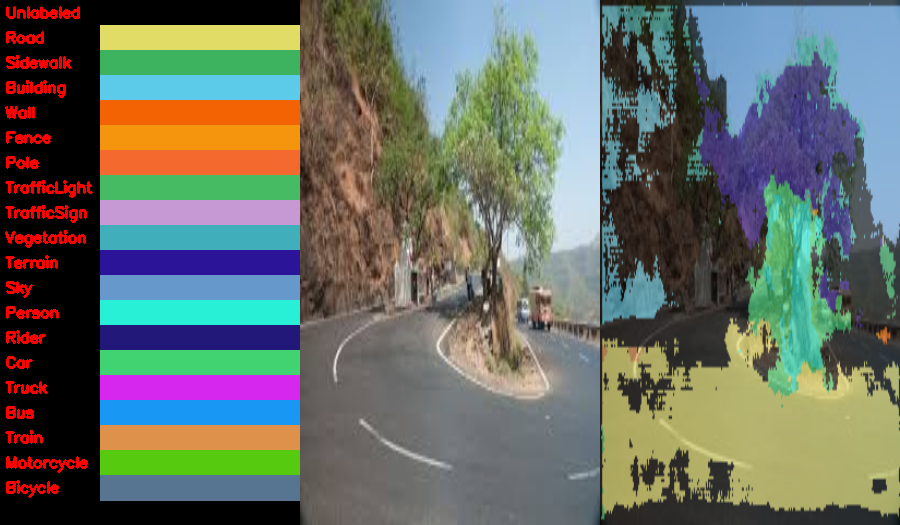

The inference took 0.5837 seconds


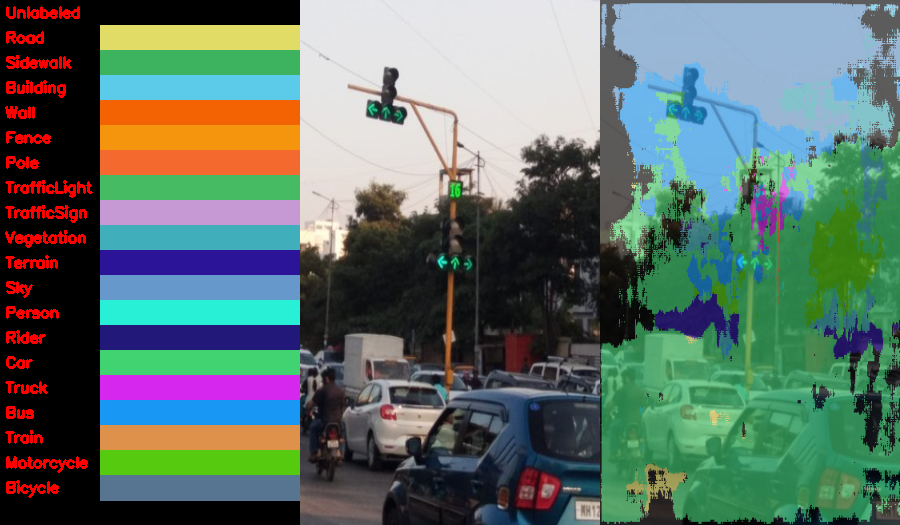

In [85]:
for images in image_list:
  img = cv2.imread(images)
  segment_image(img)
